In [4]:
# pip install hdbscan scikit-learn matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [5]:
# 1. Non‑linear toy data
X, _ = make_moons(n_samples=600, noise=0.06, random_state=42)
X_scaled = StandardScaler().fit_transform(X)


In [7]:

# 2. Fit HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=20,       # smallest group
                            min_samples=10,            # density softness
                            metric='euclidean',
                            cluster_selection_method='eom')
labels = clusterer.fit_predict(X_scaled)   

/Users/shiva/PycharmProjects/mlearn_poc/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shiva/PycharmProjects/mlearn_poc/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [8]:
# 3. Metrics
n_clusters = clusterer.labels_.max() + 1
n_noise    = (labels == -1).sum()
sil        = silhouette_score(X_scaled, labels) if n_clusters > 1 else np.nan

print(f"clusters = {n_clusters},  noise pts = {n_noise},  silhouette = {sil:.2f}")


clusters = 2,  noise pts = 3,  silhouette = 0.24


/Users/shiva/PycharmProjects/mlearn_poc/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shiva/PycharmProjects/mlearn_poc/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shiva/PycharmProjects/mlearn_poc/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


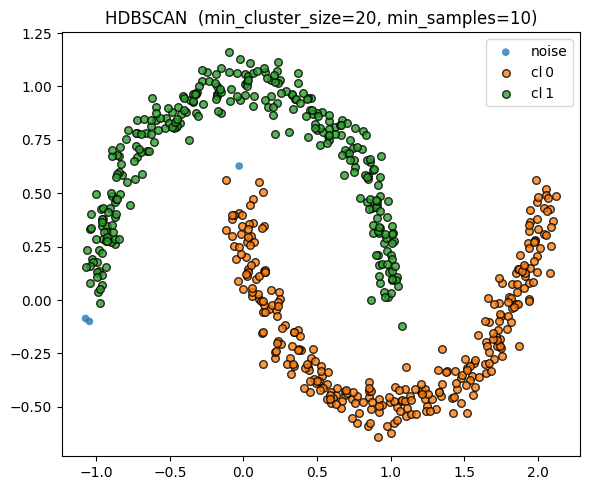

In [9]:
# 4. Plot
plt.figure(figsize=(6,5))
for lbl in np.unique(labels):
    mask = labels == lbl
    plt.scatter(X[mask,0], X[mask,1],
                s=30,
                label='noise' if lbl == -1 else f'cl {lbl}',
                alpha=0.8,
                edgecolor='k' if lbl != -1 else 'none')
plt.title(f'HDBSCAN  (min_cluster_size=20, min_samples=10)')
plt.legend()
plt.tight_layout(); plt.show()